In [98]:
from __future__ import print_function, division

import thinkbayes2

import thinkplot
import numpy

import math
import random
import sys

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')



obs_x = [1.5, 2, 3, 4, 5, 12]  #can only see particles from 1 to 20


def BiasPmf(pmf, label=None):
    """Returns the Pmf with values outside 1-20 removed.
    
    If invert=True, computes in inverse operation; for example,
    unbiasing a sample collected from students.

    Args:
      pmf: Pmf object.
      label: string name for the new Pmf.
      invert: boolean

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x in pmf.Values():
        if x < 1 or x > 20:
            new_pmf.Mult(x, 0)        
    new_pmf.Normalize()
    return new_pmf


def EvalBiasedExpPdf(k, lam, low = 1, high = 20):
    """
    Function to evaluate an exponential pdf which is biased by removing
    all values below 'low' and above 'high'. 
    """
    correction = math.exp(-lam * low) - math.exp(-lam * high) # range of probabilities covered by biased pdf
    prob = lam * math.exp(-lam * k) / correction # scale the probabilities based on the range.
                                                 # as the visible range shrinks, the prob of observing a particle 
                                                 # in the range goes up due to observer bias
    return prob


class Particle(thinkbayes2.Suite):
    
    def __init__(self):
        pmf = thinkbayes2.MakeUniformPmf(0.001,2,1001)
        thinkbayes2.Suite.__init__(self,pmf)
        
    def Likelihood(self,data,hypo):
        lam = hypo
        k = data
        like = EvalBiasedExpPdf(k, lam)
        return like
    



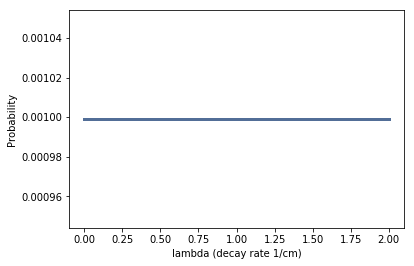

In [99]:

part = Particle()

#plot prior
thinkplot.PrePlot(1)
thinkplot.Pdf(part)
thinkplot.Config(xlabel='lambda (decay rate 1/cm)',
                ylabel='Probability')


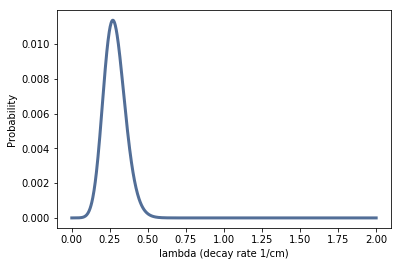

In [102]:
part.UpdateSet(obs_x)

#plot posterior
thinkplot.PrePlot(1)
thinkplot.Pdf(part)
thinkplot.Config(xlabel='lambda (decay rate 1/cm)',
                ylabel='Probability')
